In [1]:
from model import FFNet, tv_model, ResBam
from learning import Learn, Selector, Metrics
from dataset import SKDS, TVDS, CDataset, ImageDatasetStats, AsTensor, Squeeze, DType

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [2]:
import numpy as np

class Dummy(CDataset):
    
    def load_data(self, boom='bust'):
        data = {1: (np.asarray([1,2,3,4]), np.asarray(100), ['apple','dog']),
                2: (np.asarray([5,6,7,8]), np.asarray(200), ['orange','cat'])}
        print(boom)
        return data
    
ds_params = {'train_params': {'embed': [('fruit',2,8,False,False),
                                        ('pet',2,8,False,False)],
                              'embed_lookup': {'fruit': {'apple': 1,
                                                         'orange': 2},
                                               'pet': {'dog': 1,
                                                       'cat': 2}},
             'boom': 'bang'}}
    
d = Dummy(**ds_params['train_params'])
d[1]           

bang
CDataset created...


(array([1, 2, 3, 4]), array(100), [tensor(1), tensor(1)])

In [ ]:
ds_params={'embed': [],
           'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

SKDS created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.559809
epoch: 0, lr: 0.01
train loss: 659037.8125, val loss: 617388.6875
sk_train_log: 0, sk_val_log: 0
learning time: 0:00:07.145932
epoch: 10, lr: 0.01
train loss: 13449.511393229166, val loss: 12086.341015625
sk_train_log: 0, sk_val_log: 0
test loss: 10123.66611328125
learning time: 0:00:11.418650
test sklean metric: 
0 



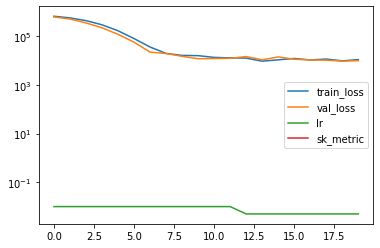

In [3]:
model_params = {'D_in': 256, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_regression',
                              'transform': None,
                              'target_transform': None,
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200}}}
             
metrics_params = {'report_interval': 10}                         
             
opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([SKDS], 
          FFNet,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

SKDS created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.792166
epoch: 0, lr: 0.01
train loss: 1.3861711335269522, val loss: 1.3551650458368762
sk_train_log: 0.5372760032739989, sk_val_log: 0.5855452272654283
learning time: 0:00:13.679918
epoch: 4, lr: 0.01
train loss: 0.8975108453642318, val loss: 1.0246657616105572
sk_train_log: 0.861173376635304, sk_val_log: 0.8240337604307905
learning time: 0:00:24.489804
epoch: 8, lr: 0.01
train loss: 0.7804856058005448, val loss: 1.0109696943184425
sk_train_log: 0.8957467192859954, sk_val_log: 0.8312282508636866
test loss: 1.0299990300474495
learning time: 0:00:27.806024
test sklean metric: 
0.828957765499283 



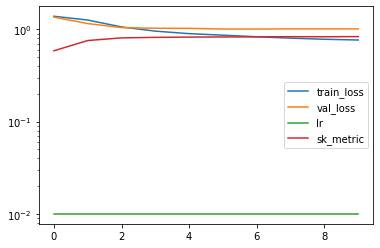

In [4]:
model_params = {'D_in': 256, 
                'H': 192, 
                'D_out': 4, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_classification',
                              'transform': transforms.Compose([AsTensor()]),
                              'target_transform': transforms.Compose([
                                                            DType('int64'),
                                                            AsTensor(),
                                                            Squeeze()]),
                              'sk_params': {'n_samples': 100000,
                                            'n_features': 256,
                                            'n_informative': 50,
                                            'n_clusters_per_class': 10,
                                            'flip_y': 0.05,
                                            'class_sep': 0.01,
                                            'n_classes': 4}}}
                                     
metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss,
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

Files already downloaded and verified
TVDS created...
Files already downloaded and verified
TVDS created...
TorchVision model resnet18 loaded...
learning time: 0:00:12.310395
epoch: 0, lr: 0.01
train loss: 2.3141584820747374, val loss: 2.080181804395491
sk_train_log: 0.6368692336177643, sk_val_log: 0.7058582715597641
learning time: 0:00:24.379913
epoch: 1, lr: 0.01
train loss: 2.018816918373108, val loss: 1.9662313595894845
sk_train_log: 0.7232677749321124, sk_val_log: 0.767148102619456
learning time: 0:00:36.414471
epoch: 2, lr: 0.01
train loss: 1.907687961578369, val loss: 1.8871607145955485
sk_train_log: 0.7667920123544147, sk_val_log: 0.7899850307856766
learning time: 0:00:48.635053
epoch: 3, lr: 0.01
train loss: 1.8379359078407287, val loss: 1.7885068405059077
sk_train_log: 0.7860049854553427, sk_val_log: 0.8093574123985252
learning time: 0:01:00.867296
epoch: 4, lr: 0.01
train loss: 1.7536346316337585, val loss: 1.6669799050977152
sk_train_log: 0.8071903906075821, sk_val_log: 0.8

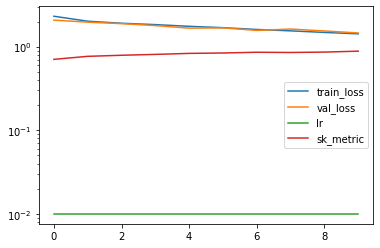

In [5]:
model_params = {'model_name': 'resnet18',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None,
                                          'download': True}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None,
                                         'download': True}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

TVDS created...
TVDS created...
CModel loaded...
ResBam model loaded...
learning time: 0:00:27.374244
epoch: 0, lr: 0.005
train loss: 1.9590251350402832, val loss: 1.8437906080676663
sk_train_log: 0.7495597243060549, sk_val_log: 0.7886553468217057
learning time: 0:00:52.794803
epoch: 1, lr: 0.005
train loss: 1.7898457403182984, val loss: 1.7786551406306605
sk_train_log: 0.8019604066325033, sk_val_log: 0.8029940090181634
learning time: 0:01:18.212156
epoch: 2, lr: 0.005
train loss: 1.696318353652954, val loss: 1.670258237469581
sk_train_log: 0.8268503623895358, sk_val_log: 0.830812095171372
learning time: 0:01:43.449466
epoch: 3, lr: 0.005
train loss: 1.6367739963531494, val loss: 1.6754721518485778
sk_train_log: 0.8379142922392526, sk_val_log: 0.8267536066860657
learning time: 0:02:08.444414
epoch: 4, lr: 0.005
train loss: 1.5603796815872193, val loss: 1.56793664732287
sk_train_log: 0.8552386710747075, sk_val_log: 0.8516119394300132
learning time: 0:02:33.535002
epoch: 5, lr: 0.005
tra

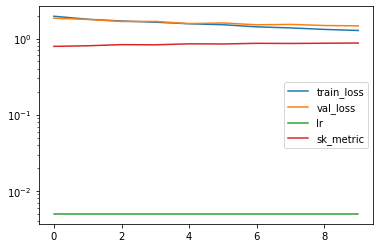

In [2]:
model_params = {'n_classes': 10,
                'residual': True,
                'in_channels': 3,
                'groups': 4,
                'bam': True,
                'dropout': [.1,.2,.3,.2,.1],
                #'act': None
               }


ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor(),
                                                       transforms.Normalize(.13,.29)]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(.13,.29)]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.005}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          ResBam, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=10)

TVDS created...
TVDS created...
TorchVision model resnext50_32x4d loaded...
learning time: 0:01:02.424987
epoch: 0, lr: 0.01
train loss: 2.616190540313721, val loss: 2.088775336742401
sk_train_log: 0.6017495892912745, sk_val_log: 0.6912890793248092
learning time: 0:02:03.865458
epoch: 1, lr: 0.01
train loss: 2.076941627025604, val loss: 2.1001727696388
sk_train_log: 0.6946141400155961, sk_val_log: 0.7177530747801008
learning time: 0:03:04.821307
epoch: 2, lr: 0.01
train loss: 2.0305287218093873, val loss: 1.998354927186043
sk_train_log: 0.71951847552573, sk_val_log: 0.7434352149876067
learning time: 0:04:05.892273
epoch: 3, lr: 0.01
train loss: 1.966199198246002, val loss: 1.9302945656161155
sk_train_log: 0.7462205015246214, sk_val_log: 0.7764489607231062
learning time: 0:05:06.974604
epoch: 4, lr: 0.01
train loss: 1.9036241960525513, val loss: 1.8125567743855138
sk_train_log: 0.7682056882838865, sk_val_log: 0.8046315465145282
learning time: 0:06:08.026109
epoch: 5, lr: 0.01
train loss

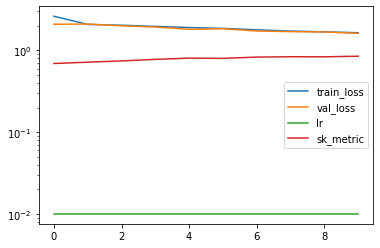

In [2]:
model_params = {'model_name': 'resnext50_32x4d',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)